In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import make_column_transformer, make_column_selector

import itertools

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import seaborn as sns
import matplotlib.pyplot as plt

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv("data.csv")

In [3]:
train.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [4]:
X = train.drop("character", axis=1)
y0 = train["character"]

In [5]:
print(y0.unique())
print(len(y0.unique()))

['character_01_ka' 'character_02_kha' 'character_03_ga' 'character_04_gha'
 'character_05_kna' 'character_06_cha' 'character_07_chha'
 'character_08_ja' 'character_09_jha' 'character_10_yna'
 'character_11_taamatar' 'character_12_thaa' 'character_13_daa'
 'character_14_dhaa' 'character_15_adna' 'character_16_tabala'
 'character_17_tha' 'character_18_da' 'character_19_dha' 'character_20_na'
 'character_21_pa' 'character_22_pha' 'character_23_ba' 'character_24_bha'
 'character_25_ma' 'character_26_yaw' 'character_27_ra' 'character_28_la'
 'character_29_waw' 'character_30_motosaw' 'character_31_petchiryakha'
 'character_32_patalosaw' 'character_33_ha' 'character_34_chhya'
 'character_35_tra' 'character_36_gya' 'digit_0' 'digit_1' 'digit_2'
 'digit_3' 'digit_4' 'digit_5' 'digit_6' 'digit_7' 'digit_8' 'digit_9']
46


In [6]:
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y0)

In [7]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90)

x_train = x_train/255
x_test = x_test/255

In [9]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(92000, 1024)
(73600, 1024)
(18400, 1024)
(73600, 46)
(18400, 46)


In [10]:
re_x_train = x_train.values.reshape(-1, 32, 32, 1)
re_x_test = x_test.values.reshape(-1, 32, 32, 1)

In [11]:
print(X.shape)
print(re_x_train.shape)
print(re_x_test.shape)
print(y_train.shape)
print(y_test.shape)

(92000, 1024)
(73600, 32, 32, 1)
(18400, 32, 32, 1)
(73600, 46)
(18400, 46)


In [12]:

model = Sequential()

model.add(Conv2D(32,(4,4),input_shape = (32,32,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(46, activation='softmax'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [14]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
print(re_x_train.shape)
print(re_x_test.shape)
print(y_train.shape)
print(y_test.shape)

(73600, 32, 32, 1)
(18400, 32, 32, 1)
(73600, 46)
(18400, 46)


In [16]:
history = model.fit(re_x_train, y_train, validation_split=0.2, epochs=20, batch_size=8, verbose=2)

Epoch 1/20
7360/7360 - 29s - loss: 0.4754 - accuracy: 0.8616 - val_loss: 0.1804 - val_accuracy: 0.9455
Epoch 2/20
7360/7360 - 19s - loss: 0.1487 - accuracy: 0.9543 - val_loss: 0.1493 - val_accuracy: 0.9528
Epoch 3/20
7360/7360 - 17s - loss: 0.0981 - accuracy: 0.9687 - val_loss: 0.1170 - val_accuracy: 0.9640
Epoch 4/20
7360/7360 - 17s - loss: 0.0757 - accuracy: 0.9757 - val_loss: 0.0968 - val_accuracy: 0.9731
Epoch 5/20
7360/7360 - 18s - loss: 0.0617 - accuracy: 0.9809 - val_loss: 0.1183 - val_accuracy: 0.9694
Epoch 6/20
7360/7360 - 19s - loss: 0.0534 - accuracy: 0.9827 - val_loss: 0.0973 - val_accuracy: 0.9759
Epoch 7/20
7360/7360 - 20s - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.1011 - val_accuracy: 0.9748
Epoch 8/20
7360/7360 - 20s - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.1188 - val_accuracy: 0.9720
Epoch 9/20
7360/7360 - 19s - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.1139 - val_accuracy: 0.9735
Epoch 10/20
7360/7360 - 17s - loss: 0.0362 - accuracy: 0.9887 - val_loss:

<AxesSubplot:>

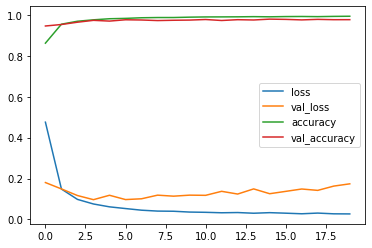

In [17]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot()

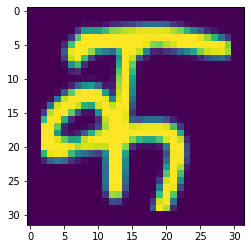

In [18]:
X_images = X.values.reshape((-1,32,32))

plt.imshow(X_images[555])
plt.show()

In [19]:
imgTrans = X_images[555].reshape(1,32,32,1)
predictions = model.predict(imgTrans)
binencoder.classes_[np.argmax(predictions)]

'character_01_ka'